In [90]:
# load libraries
library(dplyr)
library("edgeR")
library(Matrix)
library(gplots)
library(RColorBrewer)
library(irlba) 
library(proxy)
library(png)
library(tidyverse)
library(ComplexHeatmap)
library(here)


working_dir <- "/scratch/jpm73279/comparative_single_cell/08.annotation_figures/oryza_sativa"

# load arguments
#args <- commandArgs(T)
#if(length(args)!=5){stop("Rscript normGBA.R <gene.sparse> <meta> <Zea_mays.AGPv4.36.Allgene.nuclear.bed> <prefix> <F>")}
#input_data <- as.character(args[1])
#meta <- as.character(args[2])
#gene <- as.character(args[3])
#prefix <- as.character(args[4])



#gene_bodysorghum_bicolor_tis_leaf_nmf_step_2_knn_27.out.de_novo.rds
input <- here(working_dir,"oryza_sativa.gene_body_acc_leaf_reclustering.counts.txt")
#input_2 <- here("/home/jpm73279/r_script_dev/lw_plotting","zea_mays.normalized_gene_acc_scores.leaf_svd_knn_100_strict.GBaccessibility.sparse")
meta <- here("/home/jpm73279/Mendieta_et_al_comparative_single_cell/metrics/annotations/os_annot/os.leaf_annotation.V1.meta.txt")
gene <- here(working_dir,"Os.leaf_markers.from_haidong.visualize.bed")
gene_DA <- here(working_dir,"Osativa_323_v7.0.gene_only.bed")
#prefix <- "TEST_SORGHUM_TEST"

meta_data <- read.delim(meta)
gene_markers <- read.delim(gene)
gene_markers <- gene_markers  %>%
    arrange(type)

#marker_list <- here(working_dir, "Os.leaf_markers.from_haidong.visualize.bed")
#markers <- readr::read_delim(marker_list, delim = "\t")
gene_markers <- gene_markers  %>%
    arrange(type)

#gene_markers <- bind_rows(gene_markers, markers)
all_markers <- gene_markers$geneID

In [91]:
(gene_markers$name)

[1] "OsFC1_Zm"                              
  [2] "OsMOC1"                                
  [3] "OsBIF2_Zm"                             
  [4] "OsHox12_Zm"                            
  [5] "OsNCED1"                               
  [6] "OsDRM3"                                
  [7] "OsNF-YB1"                              
  [8] "OsPR602"                               
  [9] "ERL1"                                  
 [10] "Cht6_ICIAt"                            
 [11] "PMEI4_ICIAt"                           
 [12] "LOC_Os11g03670_ICIAt"                  
 [13] "LOC_Os10g31660"                        
 [14] "ACL1"                                  
 [15] "hct_Zm"                                
 [16] "bhlh43_Zm"                             
 [17] "dct2_Zm"                               
 [18] "LOC_Os01g71540"                        
 [19] "LOC_Os02g01890"                        
 [20] "LOC_Os02g14170"                        
 [21] "LOC_Os04g45730"                        
 [22] "LOC_Os05g13620"                        
 [23] "LOC_Os05g15040"                        
 [24] "LOC_Os05g23194"                        
 [25] "LOC_Os08g01240"                        
 [26] "LOC_Os08g15258"                        
 [27] "LOC_Os09g26260"                        
 [28] "LOC_Os09g34214"                        
 [29] "LOC_Os09g39940"                        
 [30] "LOC_Os10g25674"                        
 [31] "LOC_Os12g39630"                        
 [32] "OsMST6"                                
 [33] "ZmNAC5"                                
 [34] "AMY3_ICIAt"                            
 [35] "qSOR1"                                 
 [36] "OsSUT5"                                
 [37] "OsFTIP1"                               
 [38] "OsSUT1"                                
 [39] "AtAAP3"                                
 [40] "OsLTPd1"                               
 [41] "bHLH093"                               
 [42] "ccdp_5_Zm"                             
 [43] "OsHyPRP06"                             
 [44] "OsPRP1.4"                              
 [45] "OsEXPA8"                               
 [46] "OsEXPA25"                              
 [47] "OsEXPA18"                              
 [48] "REP1"                                  
 [49] "LOC_Os01g06250_At"                     
 [50] "LOC_Os02g11950_ICIat"                  
 [51] "LOC_Os03g17220_ICIat"                  
 [52] "LOC_Os03g24930_ICIat"                  
 [53] "LOC_Os04g58760_ICIat"                  
 [54] "LOC_Os08g03450_insiC"                  
 [55] "LOC_Os10g06680"                        
 [56] "SPK"                                   
 [57] "SHL4"                                  
 [58] "ocl1_Zm"                               
 [59] "GL1-6"                                 
 [60] "pdf2_Zm"                               
 [61] "pdf1_Zm"                               
 [62] "OsSRL1"                                
 [63] "ZmFDL"                                 
 [64] "ocl5_Zm"                               
 [65] "ocl3_Zm"                               
 [66] "ZmAD1"                                 
 [67] "ONI1"                                  
 [68] "ZmOCL4"                                
 [69] "LOC_Os04g03579"                        
 [70] "DWT1"                                  
 [71] "OsMADS1"                               
 [72] "OsMADS6"                               
 [73] "OsKAT2"                                
 [74] "kch4_Zm"                               
 [75] "OsSLAC1"                               
 [76] "OsCDKB1.1"                             
 [77] "mute_Zm"                               
 [78] "flp_Zm"                                
 [79] "OsCYCA2.1"                             
 [80] "OSH1"                                  
 [81] "IG1"                                   
 [82] "OsASR1"                                
 [83] "LOC_Os01g58910_ICIat"                  
 [84] "LOC_Os01g65790_ICIat"                  
 [85] "LOC_Os07g47790_ICIat"                  
 [86] "

In [84]:
glimpse(gene_markers)

glimpse(distinct(gene_markers))

Rows: 238
Columns: 6
$ chr    <chr> "Chr3", "Chr6", "Chr12", "Chr3", "Chr2", "Chr9", "Chr2", "Chr1"~
$ star   <int> 28428503, 24311419, 26055220, 5180654, 29026069, 16153175, 3019~
$ end    <int> 28430462, 24316382, 26057002, 5182185, 29028259, 16155170, 3019~
$ geneID <chr> "LOC_Os03g49880", "LOC_Os06g40780", "LOC_Os12g42020", "LOC_Os03~
$ name   <chr> "OsFC1_Zm", "OsMOC1", "OsBIF2_Zm", "OsHox12_Zm", "OsNCED1", "Os~
$ type   <chr> "AM", "AM", "AM", "AMperiphery", "AbLeafPrimordia", "AbLeafPrim~
Rows: 238
Columns: 6
$ chr    <chr> "Chr3", "Chr6", "Chr12", "Chr3", "Chr2", "Chr9", "Chr2", "Chr1"~
$ star   <int> 28428503, 24311419, 26055220, 5180654, 29026069, 16153175, 3019~
$ end    <int> 28430462, 24316382, 26057002, 5182185, 29028259, 16155170, 3019~
$ geneID <chr> "LOC_Os03g49880", "LOC_Os06g40780", "LOC_Os12g42020", "LOC_Os03~
$ name   <chr> "OsFC1_Zm", "OsMOC1", "OsBIF2_Zm", "OsHox12_Zm", "OsNCED1", "Os~
$ type   <chr> "AM", "AM", "AM", "AMperiphery", "AbLeafPrimordia", "AbLeafPrim

In [53]:
multiple <- gene_markers %>% 
    group_by(name) %>% 
    summarise(count = n()) %>% 
    dplyr::filter(count > 1)

In [64]:
`%ni%` <- Negate(`%in%`)

meta_data  <- meta_data %>% 
  dplyr::mutate(final_annotation = annotation_v1) %>% 
  mutate(cell_type = case_when(final_annotation == "phloem_sieve_elements" ~ "companion_cells/sieve_elements",
                               final_annotation == "companion_cell" ~ "companion_cells/sieve_elements",
                               final_annotation == "companion_cells_sieve_elements" ~ "companion_cells/sieve_elements",
                               final_annotation == "mesophyll;developing" ~ "mesophyll developing",
                               TRUE ~ final_annotation)) %>% 
  dplyr::filter(is.na(cell_type) != TRUE)  %>%  
  mutate(cell_type = str_replace_all(cell_type, "_", " "))  %>% 
  mutate_at(vars(cell_type), 
            list(factor)) %>% 
  dplyr::filter(cell_type != "unknown cells 1") %>% 
  dplyr::filter(cell_type != "unknown cells 2")

meta_data  %>% 
    group_by(cell_type)  %>% 
    summarise(counts = n())



cell_type,counts
<fct>,<int>
bundle sheath,557
companion cells/sieve elements,1513
epidermis,810
mesophyll,2254
protoderm,636


In [65]:
all_markers <- gene_markers$geneID

raw_cpm_counts_all_genes <- read_delim(input, delim="\t", col_names = c("gene_name", "barcode", "accessability")) %>%
    dplyr::mutate(cellID = barcode)  %>%
    dplyr::mutate(geneID = gene_name)

colnames(meta_data)

merged_meta_cpm_information <- left_join(meta_data, raw_cpm_counts_all_genes, by = c("cellID"))  %>%
    #mutate(safe_cluster_name = str_c("Louvain_C", LouvainClusters, sep ="_"))  %>%
    #dplyr::select(-LouvainClusters)  %>%
    group_by(cell_type, geneID)  %>%
    summarise(counts = sum(accessability, na.rm = TRUE))

### Alt CPM Calc
merged_meta_cpm_information_copied <- merged_meta_cpm_information
catch <- merged_meta_cpm_information_copied  %>%
    group_by(cell_type) %>%
    group_map(~(cpm(.x$counts, log = FALSE, group = .f)), .keep = TRUE)  %>%
    unlist()

Rows: 102767261 Columns: 3
-- Column specification --------------------------------------------------------
Delimiter: "\t"
chr (2): gene_name, barcode
dbl (1): accessability

i Use `spec()` to retrieve the full column specification for this data.
i Specify the column types or set `show_col_types = FALSE` to quiet this message.


[1] "cellID"             "total"              "tss"               
 [4] "acrs"               "ptmt"               "nSites"            
 [7] "log10nSites"        "pTSS"               "FRiP"              
[10] "pOrg"               "tss_z"              "acr_z"             
[13] "sites_z"            "qc_check"           "background"        
[16] "cellbulk"           "is_cell"            "sampleID"          
[19] "umap1"              "umap2"              "doubletscore"      
[22] "d.type"             "LouvainClusters"    "V1_annotation"     
[25] "subcluster_lc_safe" "annotation_v1"      "final_annotation"  
[28] "cell_type"

`summarise()` has grouped output by 'cell_type'. You can override using the
`.groups` argument.


In [66]:
caught_values <- as_tibble(catch)
see <- ungroup(merged_meta_cpm_information_copied)
merged_meta_cpm_information_copied<- bind_cols(merged_meta_cpm_information_copied,caught_values)  %>% 
    rename(grouped_CPM = value)

head(merged_meta_cpm_information_copied)

head(merged_meta_cpm_information_copied)
altered_deseq2 <- merged_meta_cpm_information_copied %>% 
    dplyr::select(-counts) %>% 
    pivot_wider(names_from = geneID, values_from = grouped_CPM, values_fill = 0) %>% 
    pivot_longer(cols = -cell_type, names_to = "geneID", values_to = "grouped_CPM") %>% 
    group_by(geneID) %>% 
    mutate(Zscore = scale(grouped_CPM)) %>% 
    ungroup()  %>% 
    #mutate(relative_accessability = rescale(Zscore, to = c(0,1))) %>% 
    group_by(cell_type)  %>% 
    mutate(Zscore_group = scale(Zscore))

# Create Proportion Cells Accessible Metrics ------------------------------
merged_meta_cellID_values <- left_join(meta_data, raw_cpm_counts_all_genes, by = c("cellID"))
take_unq_genes <- unique(merged_meta_cellID_values$geneID)


merged_meta_cellID_values_all_genes <- merged_meta_cellID_values %>% 
    select(cellID, cell_type, accessability, geneID) 

dim(merged_meta_cellID_values_all_genes)

dim(unique(merged_meta_cellID_values_all_genes))

merged_meta_cellID_values_all_genes  %>% 
    group_by(cellID, cell_type, accessability, geneID)  %>% 
    summarise(counts=n())  %>% 
    dplyr::filter(counts > 1)

colnames(merged_meta_cellID_values_all_genes)
colnames(merged_meta_cellID_values_all_genes)

wider_all_genes_altered <- merged_meta_cellID_values_all_genes %>% 
                    distinct()  %>% 
                    pivot_wider(names_from = geneID, 
                                values_from = accessability,  
                                values_fill = 0) %>% 
                    pivot_longer(cols = c(-cell_type, -cellID), 
                                 names_to = "geneID", 
                                 values_to = "accessability") %>% 
                    mutate(expression_bool = case_when(accessability < 1 ~ 0,
                                                       accessability >= 1 ~ 1)) %>% 
                    group_by(cell_type, geneID) %>% 
                    summarise(total_cells = n(), 
                              proportion_expressing = (sum(expression_bool)/total_cells * 100))


#colnames(merged_meta_cellID_values_all_genes)
#merged_meta_cellID_values_all_genes %>% 
#    group_by(V3_annotation_n) %>% 
#    select(-accessability, -cellID) %>% 
#    unique() %>% 
#    summarise(count = n())

### Updated DE-seq2 with only Well established Markers
#good_marker_list <- c('pepc1', "cah1", "ssu1", "ssu2", "agp2", "me_ortho_count_23", "sut1", "ccr1", "dct2", "mute",
#                     "shr1_v4v5count_1", "sut7", 'sweet13a','sweet13b','sweet13c','sweet1b', "ba2", 
#                      "cvp2", "fdl", "cvl2", "ad1", "gpat12", "acl1", "bm5", "fcp1", "ids1", "KCS1", 
#                      "mdh6", "vt2","ZmAPL", "ZmSWEET11", "zyb14", "gpat11", "gpat12", "ocl5", "ocl4", 
#                      "slac_v4v5count_1", "bhlh43", "dct2", "KCS1", "scr1", "ZmLAX2", "acl5", "pdf1", 
#                      "pdf2", "ZmLRD3", "ad1", "ZmSMXL4_v4v5count_1", "SID1", "bk1_v4v5count_1", "ZmSMXL5")

#good_gene_markers <- gene_markers  %>% 
#    filter(name %in% good_marker_list)
#head(good_gene_markers)

cell_type,geneID,counts,grouped_CPM
<fct>,<chr>,<dbl>,<dbl>
bundle sheath,ChrSy.fgenesh.gene.1,9,0.5487074
bundle sheath,ChrSy.fgenesh.gene.18,42,2.5606346
bundle sheath,ChrSy.fgenesh.gene.19,41,2.4996671
bundle sheath,ChrSy.fgenesh.gene.2,42,2.5606346
bundle sheath,ChrSy.fgenesh.gene.20,16,0.9754799
bundle sheath,ChrSy.fgenesh.gene.21,492,29.9960054


cell_type,geneID,counts,grouped_CPM
<fct>,<chr>,<dbl>,<dbl>
bundle sheath,ChrSy.fgenesh.gene.1,9,0.5487074
bundle sheath,ChrSy.fgenesh.gene.18,42,2.5606346
bundle sheath,ChrSy.fgenesh.gene.19,41,2.4996671
bundle sheath,ChrSy.fgenesh.gene.2,42,2.5606346
bundle sheath,ChrSy.fgenesh.gene.20,16,0.9754799
bundle sheath,ChrSy.fgenesh.gene.21,492,29.9960054


[1] 43716253        4

[1] 43716253        4

`summarise()` has grouped output by 'cellID', 'cell_type', 'accessability'. You
can override using the `.groups` argument.


cellID,cell_type,accessability,geneID,counts
<chr>,<fct>,<dbl>,<chr>,<int>


[1] "cellID"        "cell_type"     "accessability" "geneID"

[1] "cellID"        "cell_type"     "accessability" "geneID"

`summarise()` has grouped output by 'cell_type'. You can override using the
`.groups` argument.


In [67]:
gene_markers

chr,star,end,geneID,name,type
<chr>,<int>,<int>,<chr>,<chr>,<chr>
axillaryBud;leaf,NA,NA,,,
axillaryBud;leaf,NA,NA,,,
axillaryBud;leaf,NA,NA,,,
axillaryBud;leaf,NA,NA,,,
axillaryBud;leaf;crownRoot;root,NA,NA,,,
axillaryBud;leaf;tassel;ear,NA,NA,,,
axillaryBud;leaf;tassel;ear,NA,NA,,,
Chr3,28428503,28430462,LOC_Os03g49880,OsFC1_Zm,AM
Chr6,24311419,24316382,LOC_Os06g40780,OsMOC1,AM


In [58]:
## 7/23/2022 List of maarkers
good_marker_list <- c('pepc1', "cah1", "ssu2__ssu1", "ssu2", "agp2", "me3_ortho_count_2", 
                      "sut1__sut7", 
                      "dct2", "shr2h__shr2", "gl1", "ZmAAP6_4","ocl1",
                     "shr1_v4v5count_1", 'sweet13a','sweet13b','sweet13c','sweet1b', 
                      "cvp2", "fdl", "cvl2", "ad1", "ids1", "knox8",
                      "mdh6", "vt2","ZmAPL", "ZmSWEET11", "zyb14", "ocl5", "ocl4", "hkt1_2", "kch1",
                      "slac_v4v5count_1", "dct2", "scr1h__scr1", "ZmLAX2", "pdf1", "ZmOPL2",
                      "xcp1", "gpat12", "pdf1", "pdf2","snd1","dct2_ortho_count_1", "mute",
                      "pdf2", "ZmLRD3", "ad1", "ZmSMXL4_v4v5count_1", "ZmSMXL5")

good_gene_markers 

marker_final_plotting <- left_join(altered_deseq2, wider_all_genes_altered, by = c("cell_type", "geneID")) %>% 
        left_join(., gene_markers, by = c("geneID"))

test_marker_clust <- marker_final_plotting  %>% 
    filter(geneID %in% good_gene_markers$geneID)  %>% 
    ungroup() %>% 
    dplyr::select(cell_type, Zscore, name)  %>% 
    pivot_wider(names_from = cell_type, values_from = Zscore) %>% 
      data.frame() # make df as tibbles -> matrix annoying

row.names(test_marker_clust) <- test_marker_clust$name  # put gene in `row`
test_marker_clust <- test_marker_clust[,-1] #drop gene column as now in rows
clust <- hclust(dist(test_marker_clust %>% as.matrix())) # hclust with distance matrix

chr,star,end,geneID,name,type
<chr>,<dbl>,<dbl>,<chr>,<chr>,<chr>
Chr3,3797690,3804132,LOC_Os03g07480,sut1__sut7,"companion_cells,xylem_parenchyma,phloem_parenchyma,pith_parenchyma"
Chr9,15492997,15497524,LOC_Os09g25850,gl1,epidermis
Chr1,3577465,3581859,LOC_Os01g07500,vt2,"epidermis,provascular_strands,"
Chr5,22481302,22484545,LOC_Os05g38350,gpat11__gpat12,"epidermis,provascular_strands,L1_spikelet_pair_meristem,L1_glume_primordia,L1_spikelet_meristem,epidermis,exodermis,endodermis"
Chr7,23868416,23871145,LOC_Os07g39820,shr2h__shr2,"mature_vascular_bundle,bundle_sheath,stomatal_precursor,subsidiary_mother_cell,guard_cell,procambial_meristem"
Chr5,22140045,22142305,LOC_Os05g37800,ZmOPS,"phloem_sieve_element_precursors,procambial_meristem"
Chr3,26064146,26069039,LOC_Os03g46090,cvp2,"phloem_sieve_element_precursors,protophloem_sieve_element"
Chr2,27487864,27494914,LOC_Os02g45250,ocl1,"protoderm,L1_SAM,L1_leaf_primordia,L1_proximal_meristem,atrichoblast,L1_inflorescence_meristem,L1_spikelet_pair_meristem,L1_spikelet_meristem,L1_upper_floral_meristem,L1_lower_floral_meristem,L1_stamen_primordia,L1_palea_primordia,L1_lemma_primordia,L1_glume_primordia,L1_branch_meristem,L1_pistil_primordia"
Chr10,22910459,22916203,LOC_Os10g42490,ocl4,"protoderm,L1_SAM,L1_leaf_primordia,trichome,L1_inflorescence_meristem,L1_spikelet_pair_meristem,L1_spikelet_meristem,L1_upper_floral_meristem,L1_lower_floral_meristem,L1_pistil_primordia,L1_stamen_primordia,L1_palea_primordia,L1_lemma_primordia,L1_glume_primordia,L1_branch_meristem"


Warning message in left_join(., gene_markers, by = c("geneID")):
"Detected an unexpected many-to-many relationship between `x` and `y`.
i Row 36061 of `x` matches multiple rows in `y`.
i Row 175 of `y` matches multiple rows in `x`.
i If a many-to-many relationship is expected, set `relationship =
  "many-to-many"` to silence this warning."


In [69]:
mat <- marker_final_plotting %>% 
    filter(geneID %in% good_gene_markers$geneID)  %>% 
    ungroup() %>% 
    dplyr::select(cell_type, Zscore, name)  %>% 
    pivot_wider(names_from = cell_type, values_from = Zscore) %>% 
      data.frame() # make df as tibbles -> matrix annoying
row.names(mat) <- mat$name  # put gene in `row`
mat <- mat[,-1] #drop gene column as now in rows
v_clust <- hclust(dist(mat %>% as.matrix() %>% t())) # hclust with distance matrix

In [70]:
#options(repr.plot.width=8, repr.plot.height=10)
fixed_order_strings <- v_clust$labels[v_clust$order]
fixed_order_strings <- gsub("companion.cells.sieve.elements", "companion cells/sieve elements", fixed_order_strings)
fixed_order_strings <- gsub("\\.", " ", fixed_order_strings)
options(repr.plot.width=8, repr.plot.height=12)

os.dotplot_catch <- marker_final_plotting  %>% 
    mutate(Gene_name = factor(name, clust$labels[clust$order]),
          Cluster_name = factor(cell_type, levels = fixed_order_strings)) %>% 
    filter(is.na(Gene_name) != TRUE) %>% 
    ggplot(., aes(x=Cluster_name, y = Gene_name, 
                               color = Zscore, size = proportion_expressing)) + 
    geom_point() + theme(axis.text.x = element_text(angle = 90)) + scale_colour_gradient2() +
    theme(panel.grid.major = element_blank(), panel.grid.minor = element_blank(), panel.background = element_blank(), axis.line.x = element_line(color="black", size = 1), axis.line.y = element_line(color="black", size = 1)) +
    ggtitle("os Z Score of Markers - Across Annotations")





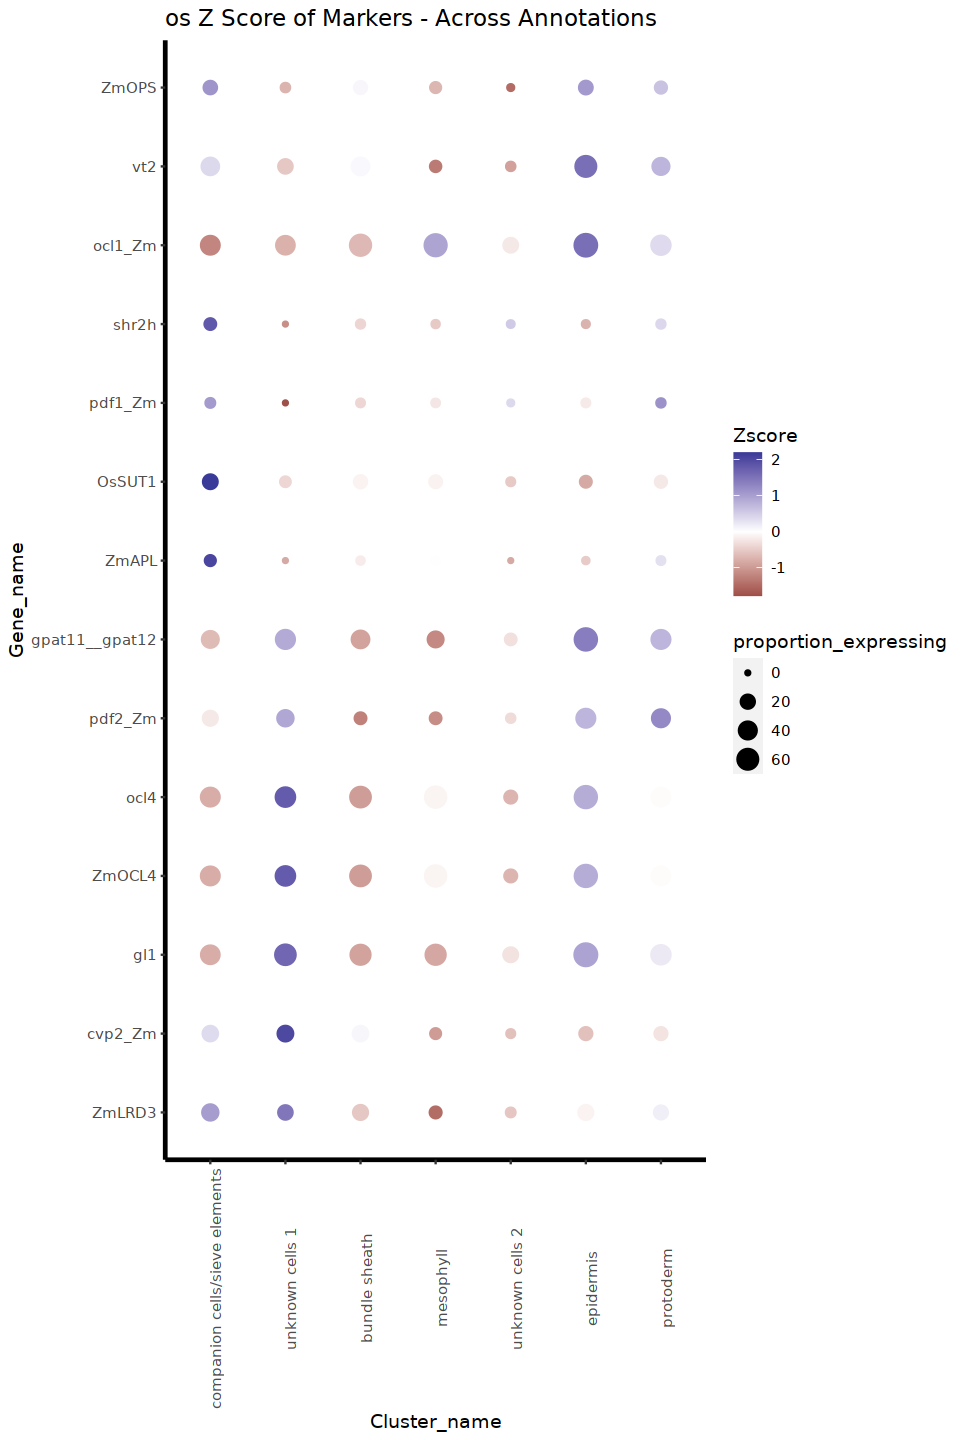

In [71]:
os.dotplot_catch

In [49]:
ggsave("Os_selected_marker_dotplot.supplamental.pdf", plot = sb.dotplot_catch,
    path = "/home/jpm73279/data_copy_over/comparative_single_cell_imgs/figures/figure_1/dotplots",
    width = 8, height = 12,
    units = c('in'), limitsize = FALSE, dpi = 300)

ERROR: Error in plot_theme(plot): object 'sb.dotplot_catch' not found


# Generate Dotplot using 2-4 Markers per cell-type. Sb Figure 1 dotplot 

In [92]:
### 7/23/2022 List of maarkers
good_marker_list <- c('Osa1 ', "Osppc4", "PPDK_1__PPDK_2", "CA_1__CA_2", "cah1", #Ms Markers                      
                      "ssu2_ortho_count_1__ssu1_ortho_count_1","ssu2_ortho_count_2__ssu1_ortho_count_2", "me3", "Dit_3_ortho_count_1",#BS Markers
                      "sut1__sut7", "ZmAPL", "ZmLRD3",#companion cells
                      #"shr2h__shr2", "shr1_v4v5count_1", "cvp2", "ZmOPS", #vasculature/procambium
                      "gl1","gpat11__gpat12", "vt2", #epidermis
                      "ocl1_Zm", "pdf2_Zm", "pdf1_Zm", #protoderm
                      "ocl1_Zm", "ocl4") #protoderm



good_gene_markers <- gene_markers  %>% 
    filter(name %in% good_marker_list)


marker_final_plotting <- left_join(altered_deseq2, wider_all_genes_altered, by = c("cell_type", "geneID")) %>% 
        left_join(., gene_markers, by = c("geneID"))

test_marker_clust <- marker_final_plotting  %>% 
    filter(name %in% good_marker_list)  %>% 
    ungroup() %>% 
    dplyr::select(cell_type, Zscore, name)  %>% 
   dplyr::mutate(name = case_when(name == "Osa1 " ~ "PEPC1",
                                  name == "Osppc4" ~ "PEPC1_2",
                                   name == "PPDK_1__PPDK_2" ~ "PDK2",
                                   name == "CA_1__CA_2" ~ "cah6", 
                                   name == "Dit_3_ortho_count_2" ~ "dct2",
                                   name == "ZmAPL" ~ "glk53",
                                   name == "ZmLRD3" ~ "limtf13",
                                   name == "ocl1_Zm" ~ "ocl1",
                                   name == "pdf1_Zm" ~ "pdf1",
                                   name == "pdf2_Zm" ~ "pdf2",
                                   name == "shr1_v4v5count_1" ~ "gras58",
                                   TRUE ~ name
                                  )) %>% 
    pivot_wider(names_from = cell_type, values_from = Zscore) %>% 
      data.frame() # make df as tibbles -> matrix annoying

row.names(test_marker_clust) <- test_marker_clust$name  # put gene in `row`
test_marker_clust <- test_marker_clust[,-1] #drop gene column as now in rows
clust <- hclust(dist(test_marker_clust %>% as.matrix())) # hclust with distance matrix

mat <- marker_final_plotting %>% 
    filter(geneID %in% good_gene_markers$geneID)  %>% 
    ungroup() %>% 
    dplyr::select(cell_type, Zscore, name)  %>% 
    pivot_wider(names_from = cell_type, values_from = Zscore) %>% 
      data.frame() # make df as tibbles -> matrix annoying
row.names(mat) <- mat$name  # put gene in `row`
mat <- mat[,-1] #drop gene column as now in rows
v_clust <- hclust(dist(mat %>% as.matrix() %>% t())) # hclust with distance matrix

options(repr.plot.width=8, repr.plot.height=10)
fixed_order_strings <- v_clust$labels[v_clust$order]
fixed_order_strings <- gsub("companion.cells.sieve.elements", "companion cells/sieve elements", fixed_order_strings)
fixed_order_strings <- gsub("\\.", " ", fixed_order_strings)


Warning message in left_join(., gene_markers, by = c("geneID")):
"Detected an unexpected many-to-many relationship between `x` and `y`.
i Row 36061 of `x` matches multiple rows in `y`.
i Row 168 of `y` matches multiple rows in `x`.
i If a many-to-many relationship is expected, set `relationship =
  "many-to-many"` to silence this warning."


In [93]:
marker_final_plotting

cell_type,geneID,grouped_CPM,Zscore,Zscore_group,total_cells,proportion_expressing,chr,star,end,name,type
<fct>,<chr>,<dbl>,"<dbl[,1]>","<dbl[,1]>",<int>,<dbl>,<chr>,<int>,<int>,<chr>,<chr>
bundle sheath,ChrSy.fgenesh.gene.1,0.5487074,-0.97287531,-1.1171446,557,0.8976661,NA,NA,NA,NA,NA
bundle sheath,ChrSy.fgenesh.gene.18,2.5606346,-0.94778959,-1.0815848,557,3.9497307,NA,NA,NA,NA,NA
bundle sheath,ChrSy.fgenesh.gene.19,2.4996671,-0.70257603,-0.7339863,557,2.8725314,NA,NA,NA,NA,NA
bundle sheath,ChrSy.fgenesh.gene.2,2.5606346,-0.58006932,-0.5603289,557,3.0520646,NA,NA,NA,NA,NA
bundle sheath,ChrSy.fgenesh.gene.20,0.9754799,-0.76200092,-0.8182231,557,1.2567325,NA,NA,NA,NA,NA
bundle sheath,ChrSy.fgenesh.gene.21,29.9960054,0.87042530,1.4957961,557,32.1364452,NA,NA,NA,NA,NA
bundle sheath,ChrSy.fgenesh.gene.22,1.0364473,-0.47775855,-0.4152999,557,1.2567325,NA,NA,NA,NA,NA
bundle sheath,ChrSy.fgenesh.gene.25,55.4194490,0.06035076,0.3474882,557,46.1400359,NA,NA,NA,NA,NA
bundle sheath,ChrSy.fgenesh.gene.26,8.1696437,-0.79571107,-0.8660083,557,10.5924596,NA,NA,NA,NA,NA


In [94]:
unique(marker_final_plotting$name)

[1] NA                                      
  [2] "fea3_Zm"                               
  [3] "LOC_Os01g04670"                        
  [4] "LOC_Os01g06250_At"                     
  [5] "PP2A1"                                 
  [6] "vt2"                                   
  [7] "me3"                                   
  [8] "RAG"                                   
  [9] "Osppc4"                                
 [10] "OsKAT2"                                
 [11] "kch4_Zm"                               
 [12] "LOC_Os01g13320_ICIat"                  
 [13] "OsEXPA8"                               
 [14] "LOC_Os01g17214"                        
 [15] "CAB2R"                                 
 [16] "OsTMM_Zm"                              
 [17] "CA_1__CA_2"                            
 [18] "DWT1"                                  
 [19] "LOC_Os01g47900"                        
 [20] "LOC_Os01g49600"                        
 [21] "myb83"                                 
 [22] "AMY3_ICIAt"                            
 [23] "LOC_Os01g57270"                        
 [24] "OsPR602"                               
 [25] "pin9"                                  
 [26] "LOC_Os01g58910_ICIat"                  
 [27] "ZmOPL2"                                
 [28] "OsWOX5_QHB"                            
 [29] "LOC_Os01g65790_ICIat"                  
 [30] "OsMADS2"                               
 [31] "IG1"                                   
 [32] "OsCDKB1.1"                             
 [33] "OsPLT5"                                
 [34] "LOC_Os01g67630"                        
 [35] "OsPLA2"                                
 [36] "OsLTPd1"                               
 [37] "OsSPS1"                                
 [38] "ZmICEa"                                
 [39] "LOC_Os01g71540"                        
 [40] "OsBOP1"                                
 [41] "OsASR1"                                
 [42] "XCP2_insiC"                            
 [43] "LOC_Os02g01890"                        
 [44] "ZmAPL"                                 
 [45] "htk1_1_At"                             
 [46] "bm5"                                   
 [47] "LOC_Os02g11950_ICIat"                  
 [48] "LOC_Os02g14170"                        
 [49] "Osa1 "                                 
 [50] "LOC_Os02g30180_ICIat"                  
 [51] "OsSUT5"                                
 [52] "Cht6_ICIAt"                            
 [53] "OsPLT3"                                
 [54] "vnd6"                                  
 [55] "ocl1_Zm"                               
 [56] "SPXMFS2"                               
 [57] "OsMADS6"                               
 [58] "brx_Zm"                                
 [59] "OsNCED1"                               
 [60] "OsNF-YB1"                              
 [61] "pin1b_Zm"                              
 [62] "LOC_Os02g51730_ICIat"                  
 [63] "RAmy1A"                                
 [64] "GL1-6"                                 
 [65] "OSHB1_OsLF1_Zm"                        
 [66] "nac78_Zm"                              
 [67] "bHLH093"                               
 [68] "OsEXPA25"                              
 [69] "OsEXPA18"                              
 [70] "OsSUT1"                                
 [71] "ONI1"                                  
 [72] "RINO1"                                 
 [73] "OsHox12_Zm"                            
 [74] "LOC_Os03g10850"                        
 [75] "LOC_Os03g11290_ICIat"                  
 [76] "DL"                                    
 [77] "OsMADS1"                               
 [78] "LOC_Os03g12120_ICIat"                  
 [79] "PLT9"                                  
 [80] "POXN"                                  
 [81] "tmo5_Zm"                               
 [82] "ZmLRD3"                                
 [83] "LOC_Os03g17220_ICIat"                  
 [84] "LOC_Os03g20900_ICIat"                  
 [85] "LOC_Os03g24930_ICIat"                  
 [86] "

Scale for colour is already present.
Adding another scale for colour, which will replace the existing scale.


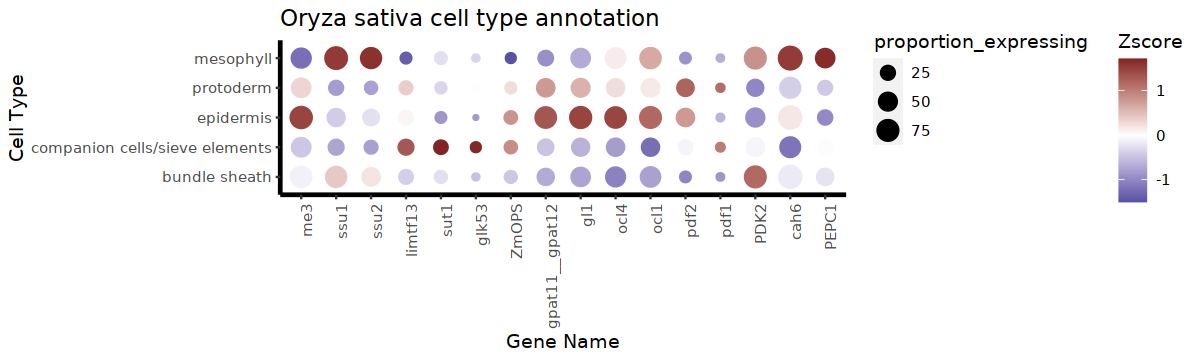

In [108]:

library(scales) # for muted

#gene_order <- c('limtf13', 'sut1__sut7', 'glk53', 'vt2', "ZmOPS" ,'cvp2', 'shr2h__shr2', 'dct2', 'me3', 'ssu2__ssu1', 'PDK2', 'cah6', 'cah1', 'pepc1', 'ocl4', 'ocl1', 'pdf2', 'pdf1', 'gpat11__gpat12', 'gl1')
gene_order <- c('dct2', 'me3',"ssu1","ssu2" ,'limtf13', 'sut1', 'glk53', 
                'ZmOPS', 'cvp2', 'shr2h__shr2',
                 'gpat11__gpat12', 'gl1',
                'ocl4', 'ocl1', 'pdf2', 'pdf1',
                'PDK2', 'cah6', 'PEPC1')

cell_type_order <-  c('bundle sheath', 'companion cells/sieve elements', 'procambial meristem', 
                'epidermis', 'protoderm', 'mesophyll', 'mesophyll developing')



options(repr.plot.width=10, repr.plot.height=3)
os_figure_marker_dotplot <- marker_final_plotting  %>% 
   dplyr::mutate(name = case_when(name == "Osppc4" ~ "PEPC1",
                                   name == "PPDK_1__PPDK_2" ~ "PDK2",
                                   name == "OsSUT1" ~ "sut1",
                                   name == "ssu2_ortho_count_1__ssu1_ortho_count_1" ~ "ssu1",
                                   name == "ssu2_ortho_count_2__ssu1_ortho_count_2" ~ "ssu2",
                                   name == "CA_1__CA_2" ~ "cah6", 
                                   name == "Dit_3_ortho_count_2" ~ "dct2",
                                   name == "ZmAPL" ~ "glk53",
                                   name == "ZmLRD3" ~ "limtf13",
                                   name == "ocl1_Zm" ~ "ocl1",
                                   name == "pdf1_Zm" ~ "pdf1",
                                   name == "pdf2_Zm" ~ "pdf2",
                                   name == "shr1_v4v5count_1" ~ "gras58",
                                   TRUE ~ name
                                  )) %>%
     mutate(Gene_name = factor(name, levels = gene_order),
          Cluster_name = factor(cell_type, levels = cell_type_order)) %>% 
    filter(is.na(Gene_name) != TRUE) %>% 
    ggplot(., aes(y=Cluster_name, x = Gene_name, 
                  color = Zscore, size = proportion_expressing)) + 
    geom_point() + theme(axis.text.x = element_text(angle = 90, hjust = 1)) +     scale_colour_gradient2(low= muted("blue"), high=muted("red")) +
    scale_colour_gradient2(low= muted("blue"), high=muted("red")) + 
    theme(panel.grid.major = element_blank(), panel.grid.minor = element_blank(), 
          panel.background = element_blank(), axis.line.x = element_line(color="black", size = 1), 
          axis.line.y = element_line(color="black", size = 1), legend.box = "horizontal") +
    ggtitle("Oryza sativa cell type annotation") +
    labs(x = "Gene Name", y = "Cell Type")  # This line was added

os_figure_marker_dotplot

In [109]:
ggsave("os_selected_marker_dotplot.main_figure.pdf", plot = os_figure_marker_dotplot,
    path = "/home/jpm73279/data_copy_over/comparative_single_cell_imgs/figures/figure_1/dotplots",
    width = 10, height = 3,
    units = c('in'), limitsize = FALSE, dpi = 300)